# LIBRERIAS

In [52]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

In [53]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [54]:
# Leo los indicadores

US_Treasury = pd.read_excel('./data/Series de precios.xlsx', sheet_name='Datos de precios', 
                           usecols=['TY1 Comdty', 'US Treasury'])

US_Treasury.columns = ['Date','Precio']
US_Treasury = US_Treasury.iloc[1:,:]
US_Treasury['Date'] = pd.to_datetime(US_Treasury['Date'], format="%Y-%m-%d")
US_Treasury = US_Treasury.set_index('Date')
US_Treasury = US_Treasury.loc['2015-04-30':,:]
US_Treasury = US_Treasury.applymap(lambda x: x/1.1285216494845334)

In [55]:
US_Treasury.head()

,Precio
Date,
2015-04-30,113.755018
2015-05-01,113.228887
2015-05-04,113.215041
2015-05-05,112.910439
2015-05-06,112.619683


In [56]:
# Calculo los retornos de cada día

US_Treasury['Retornos diarios'] = 0

for i in range(1, len(US_Treasury)):
    
    US_Treasury['Retornos diarios'].iloc[i] = US_Treasury.Precio.iloc[i] - US_Treasury.Precio.iloc[i-1]


In [57]:
# Visualizo una muestra

US_Treasury.head(20)

,Precio,Retornos diarios
Date,,
2015-04-30,113.755018,0.000000
2015-05-01,113.228887,-0.526131
2015-05-04,113.215041,-0.013846
2015-05-05,112.910439,-0.304602
2015-05-06,112.619683,-0.290756
2015-05-07,112.882748,0.263065
2015-05-08,113.270423,0.387675
2015-05-11,112.439691,-0.830733
2015-05-12,112.578146,0.138455


In [58]:
# Calculo las ganancias y pérdidas // Tuve que meter un cero porque si dejo un string vacío o np.nan da problemas y 
# paso de comerme la cabeza, habra una solucion mejor pero esta es rapida

US_Treasury['Ganancias'] = np.where((US_Treasury['Retornos diarios']>0), round(US_Treasury['Retornos diarios'],4), 0)
US_Treasury['Perdidas'] = np.where((US_Treasury['Retornos diarios']<0), round(US_Treasury['Retornos diarios'],4), 0)

In [59]:
# Visualizo una muestra

US_Treasury.head(10)

,Precio,Retornos diarios,Ganancias,Perdidas
Date,,,,
2015-04-30,113.755018,0.000000,0.0000,0.0000
2015-05-01,113.228887,-0.526131,0.0000,-0.5261
2015-05-04,113.215041,-0.013846,0.0000,-0.0138
2015-05-05,112.910439,-0.304602,0.0000,-0.3046
2015-05-06,112.619683,-0.290756,0.0000,-0.2908
2015-05-07,112.882748,0.263065,0.2631,0.0000
2015-05-08,113.270423,0.387675,0.3877,0.0000
2015-05-11,112.439691,-0.830733,0.0000,-0.8307
2015-05-12,112.578146,0.138455,0.1385,0.0000


In [60]:
# Ahora calculo la media de ganancias y pérdidas en periodos de 14 dias

US_Treasury['Media ganancias'] = US_Treasury.Ganancias.rolling(window=14).mean()
US_Treasury['Media perdidas'] = US_Treasury.Perdidas.rolling(window=14).mean()

In [61]:
# Visualizo una muestra

US_Treasury.head(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas
Date,,,,,,
2015-04-30,113.755018,0.000000,0.0000,0.0000,NaN,NaN
2015-05-01,113.228887,-0.526131,0.0000,-0.5261,NaN,NaN
2015-05-04,113.215041,-0.013846,0.0000,-0.0138,NaN,NaN
2015-05-05,112.910439,-0.304602,0.0000,-0.3046,NaN,NaN
2015-05-06,112.619683,-0.290756,0.0000,-0.2908,NaN,NaN
2015-05-07,112.882748,0.263065,0.2631,0.0000,NaN,NaN
2015-05-08,113.270423,0.387675,0.3877,0.0000,NaN,NaN
2015-05-11,112.439691,-0.830733,0.0000,-0.8307,NaN,NaN
2015-05-12,112.578146,0.138455,0.1385,0.0000,NaN,NaN


In [62]:
# Calculo el RS, el cociente entre ganancias medias y perdidas medias

US_Treasury['RS'] = abs(US_Treasury['Media ganancias'] / US_Treasury['Media perdidas'])

In [63]:
# Visualizo una muestra

US_Treasury.head(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas,RS
Date,,,,,,,
2015-04-30,113.755018,0.000000,0.0000,0.0000,NaN,NaN,NaN
2015-05-01,113.228887,-0.526131,0.0000,-0.5261,NaN,NaN,NaN
2015-05-04,113.215041,-0.013846,0.0000,-0.0138,NaN,NaN,NaN
2015-05-05,112.910439,-0.304602,0.0000,-0.3046,NaN,NaN,NaN
2015-05-06,112.619683,-0.290756,0.0000,-0.2908,NaN,NaN,NaN
2015-05-07,112.882748,0.263065,0.2631,0.0000,NaN,NaN,NaN
2015-05-08,113.270423,0.387675,0.3877,0.0000,NaN,NaN,NaN
2015-05-11,112.439691,-0.830733,0.0000,-0.8307,NaN,NaN,NaN
2015-05-12,112.578146,0.138455,0.1385,0.0000,NaN,NaN,NaN


In [64]:
# Ahora calculo RSI, la formula es 100 - 100 / (1 + RS)

US_Treasury['RSI'] = 100 - 100 / (1 + US_Treasury['RS'])

In [65]:
# Visualizo una muestra

US_Treasury.head(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas,RS,RSI
Date,,,,,,,,
2015-04-30,113.755018,0.000000,0.0000,0.0000,NaN,NaN,NaN,NaN
2015-05-01,113.228887,-0.526131,0.0000,-0.5261,NaN,NaN,NaN,NaN
2015-05-04,113.215041,-0.013846,0.0000,-0.0138,NaN,NaN,NaN,NaN
2015-05-05,112.910439,-0.304602,0.0000,-0.3046,NaN,NaN,NaN,NaN
2015-05-06,112.619683,-0.290756,0.0000,-0.2908,NaN,NaN,NaN,NaN
2015-05-07,112.882748,0.263065,0.2631,0.0000,NaN,NaN,NaN,NaN
2015-05-08,113.270423,0.387675,0.3877,0.0000,NaN,NaN,NaN,NaN
2015-05-11,112.439691,-0.830733,0.0000,-0.8307,NaN,NaN,NaN,NaN
2015-05-12,112.578146,0.138455,0.1385,0.0000,NaN,NaN,NaN,NaN


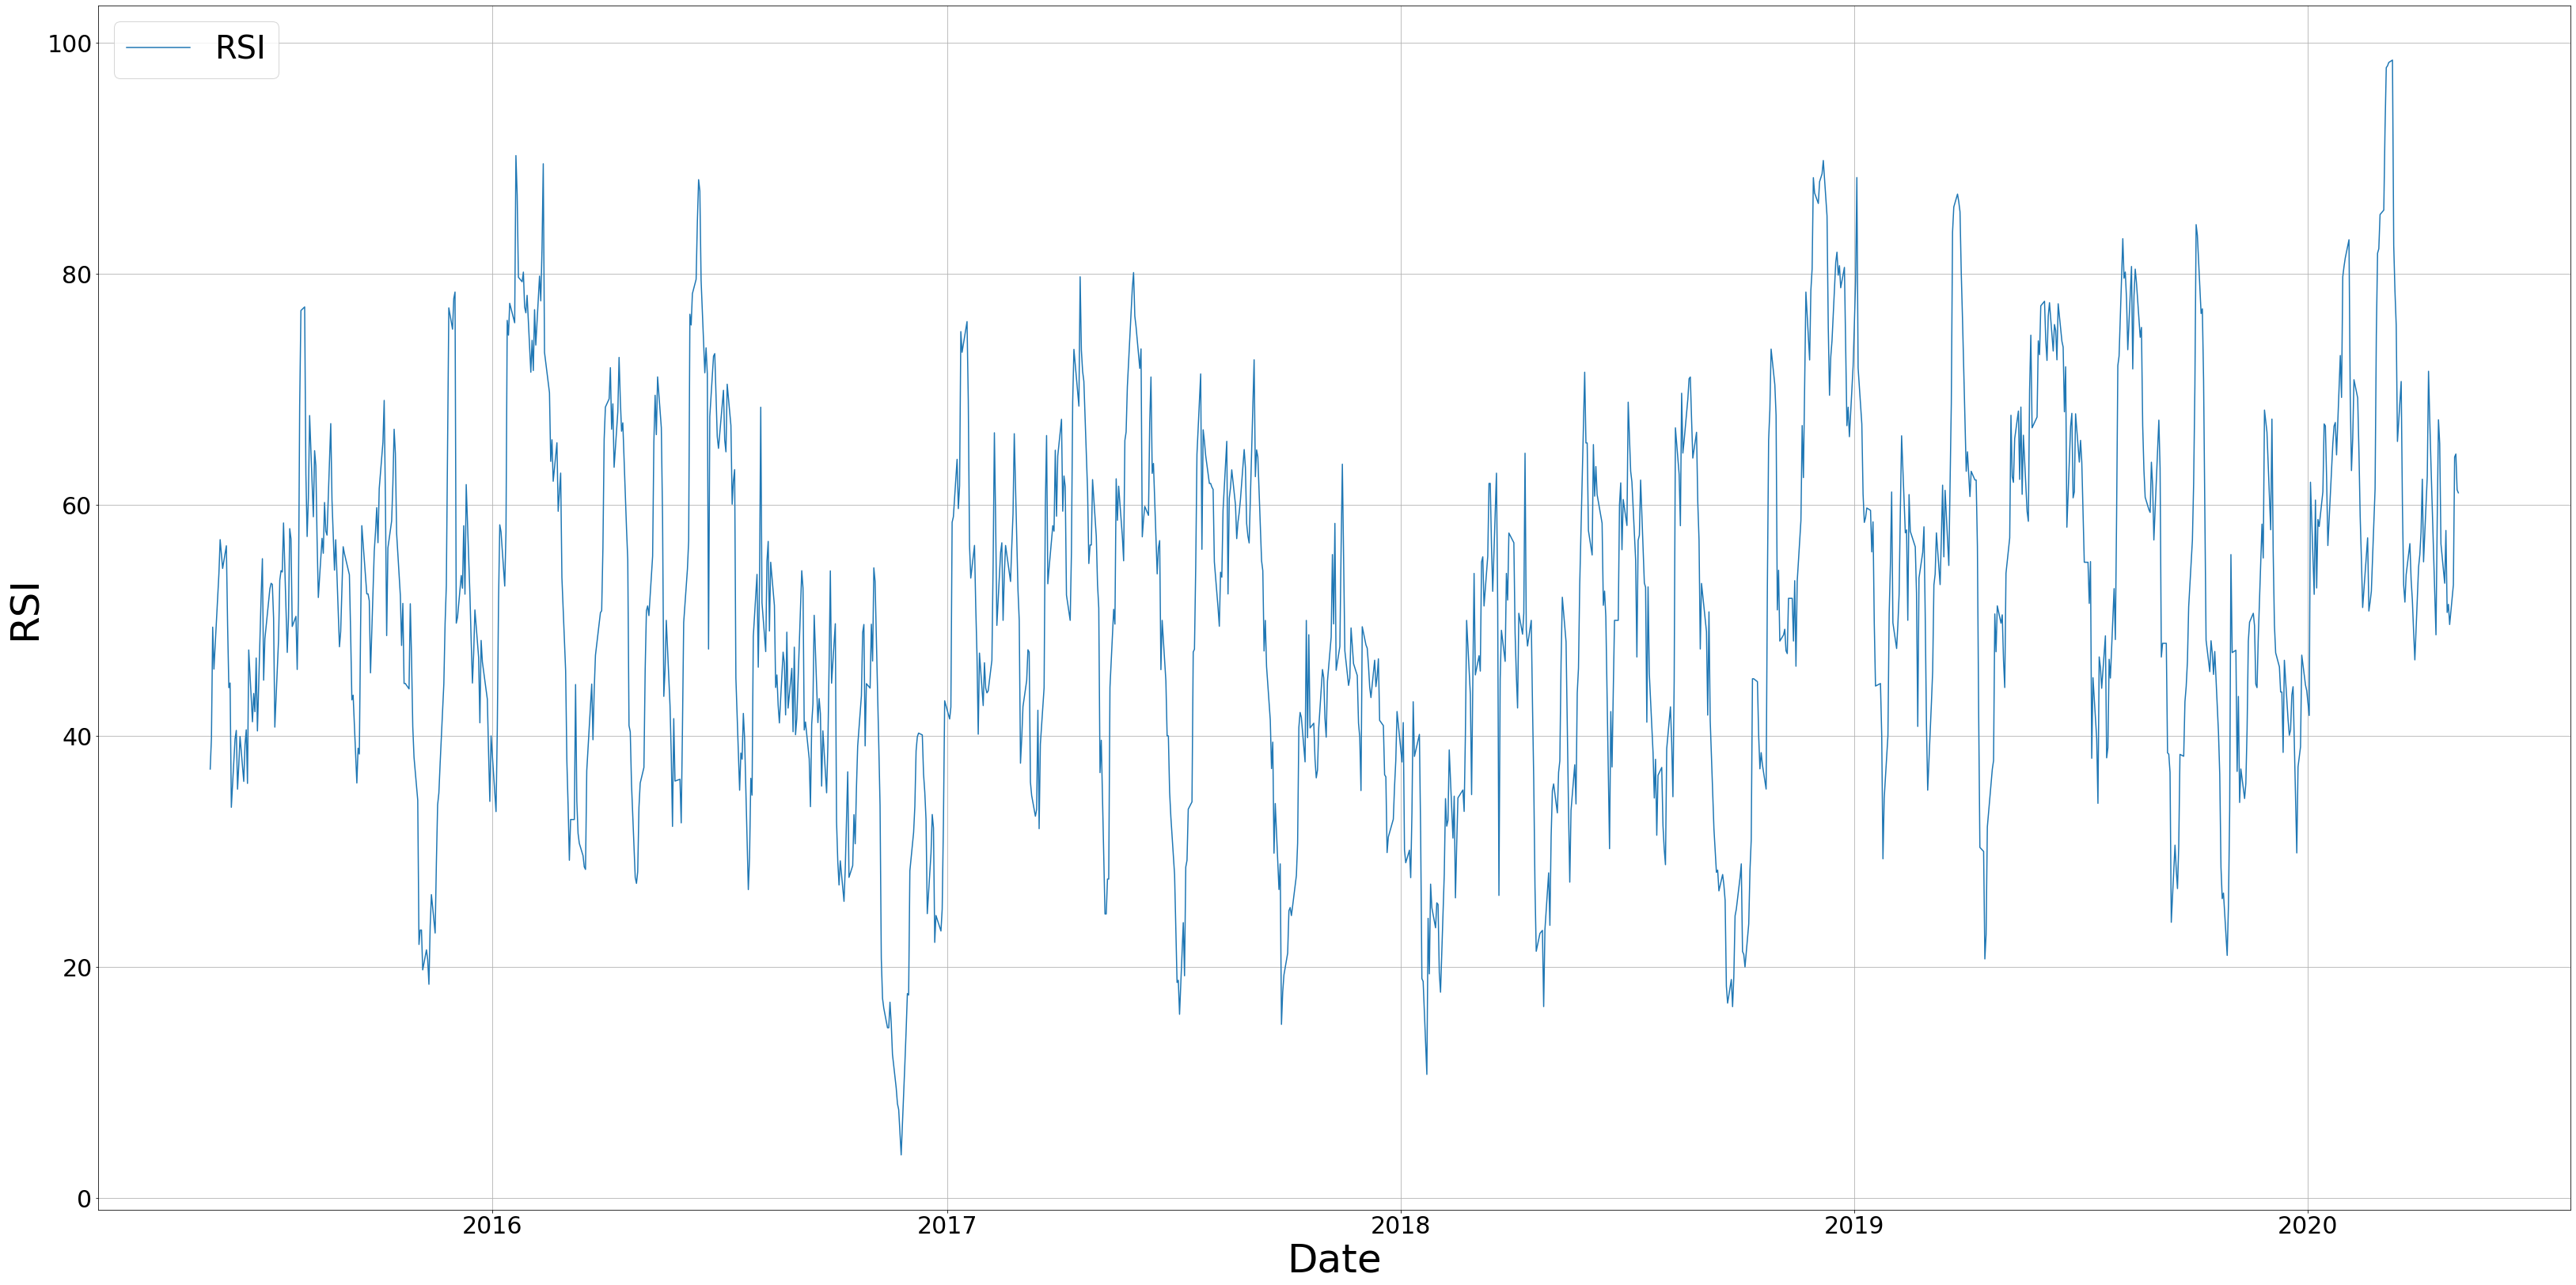

In [66]:
# Grafico la evolución del RSI

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(US_Treasury["RSI"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("RSI", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["RSI"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [67]:
# Genero la señal de compra y venta // sobrecompra(-1) -> RSI >= 70 - sobreventa(1) -> RSI <= 30

US_Treasury['Señal'] = np.where(US_Treasury.RSI >= 70, -1, np.where(US_Treasury.RSI <= 30, 1, 0))

In [68]:
# Visualizo una muestra

US_Treasury.tail(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas,RS,RSI,Señal
Date,,,,,,,,,
2020-04-03,123.294600,0.221529,0.2215,0.0000,0.370857,-0.302621,1.225482,55.065916,0
2020-04-06,122.643859,-0.650741,0.0000,-0.6507,0.370857,-0.222514,1.666667,62.500000,0
2020-04-07,122.200801,-0.443058,0.0000,-0.4431,0.370857,-0.147357,2.516723,71.564438,-1
2020-04-08,122.145419,-0.055382,0.0000,-0.0554,0.311521,-0.151314,2.058771,67.307128,0
2020-04-09,122.505403,0.359984,0.3600,0.0000,0.262071,-0.151314,1.731968,63.396344,0
2020-04-13,122.353102,-0.152301,0.0000,-0.1523,0.154271,-0.162193,0.951160,48.748448,0
2020-04-14,122.477712,0.124610,0.1246,0.0000,0.163171,-0.114721,1.422327,58.717389,0
2020-04-15,123.308445,0.830733,0.8307,0.0000,0.222507,-0.107800,2.064074,67.363709,0
2020-04-16,123.377673,0.069228,0.0692,0.0000,0.202729,-0.107800,1.880599,65.284998,0


In [69]:
# Genero un nuevo dataframe donde ver los resultados de la estrategia

Resultados = US_Treasury.loc[:,['Precio', 'Señal']]
Resultados.head()

,Precio,Señal
Date,,
2015-04-30,113.755018,0
2015-05-01,113.228887,0
2015-05-04,113.215041,0
2015-05-05,112.910439,0
2015-05-06,112.619683,0


In [70]:
# Creo la variable que muestra los resultados

Resultados['Mean Rev'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Mean Rev'].iloc[i] = Resultados['Mean Rev'].iloc[i-1]*(1+Resultados.Señal.iloc[i-1]*
                                                                          (Resultados.Precio.iloc[i]/Resultados.Precio.iloc[i-1]-1))

In [71]:
# Visualizo una muestra

Resultados.tail(20)

,Precio,Señal,Mean Rev
Date,,,
2020-04-03,123.294600,0,95.918728
2020-04-06,122.643859,0,95.918728
2020-04-07,122.200801,-1,95.918728
2020-04-08,122.145419,0,95.962199
2020-04-09,122.505403,0,95.962199
2020-04-13,122.353102,0,95.962199
2020-04-14,122.477712,0,95.962199
2020-04-15,123.308445,0,95.962199
2020-04-16,123.377673,0,95.962199


In [72]:
# Genero el Buy&Hold para hacer la comparación

Resultados['Buy&Hold'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Buy&Hold'].iloc[i] = Resultados['Buy&Hold'].iloc[i-1]*(1+(Resultados.Precio.iloc[i]/
                                                                         Resultados.Precio.iloc[i-1]-1))

In [73]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal,Mean Rev,Buy&Hold
Date,,,,
2019-09-11,114.613441,0,95.722251,100.754625
2019-12-26,113.755018,0,96.414038,100.000000
2019-01-17,107.676822,0,97.943380,94.656767
2016-11-11,112.688910,1,99.704618,99.062804
2016-05-09,115.901077,0,98.951669,101.886563
2019-02-27,108.036806,0,97.666846,94.973223
2016-06-14,116.717965,-1,98.668424,102.604674
2020-04-09,122.505403,0,95.962199,107.692308
2017-03-20,110.473623,0,99.079066,97.115385


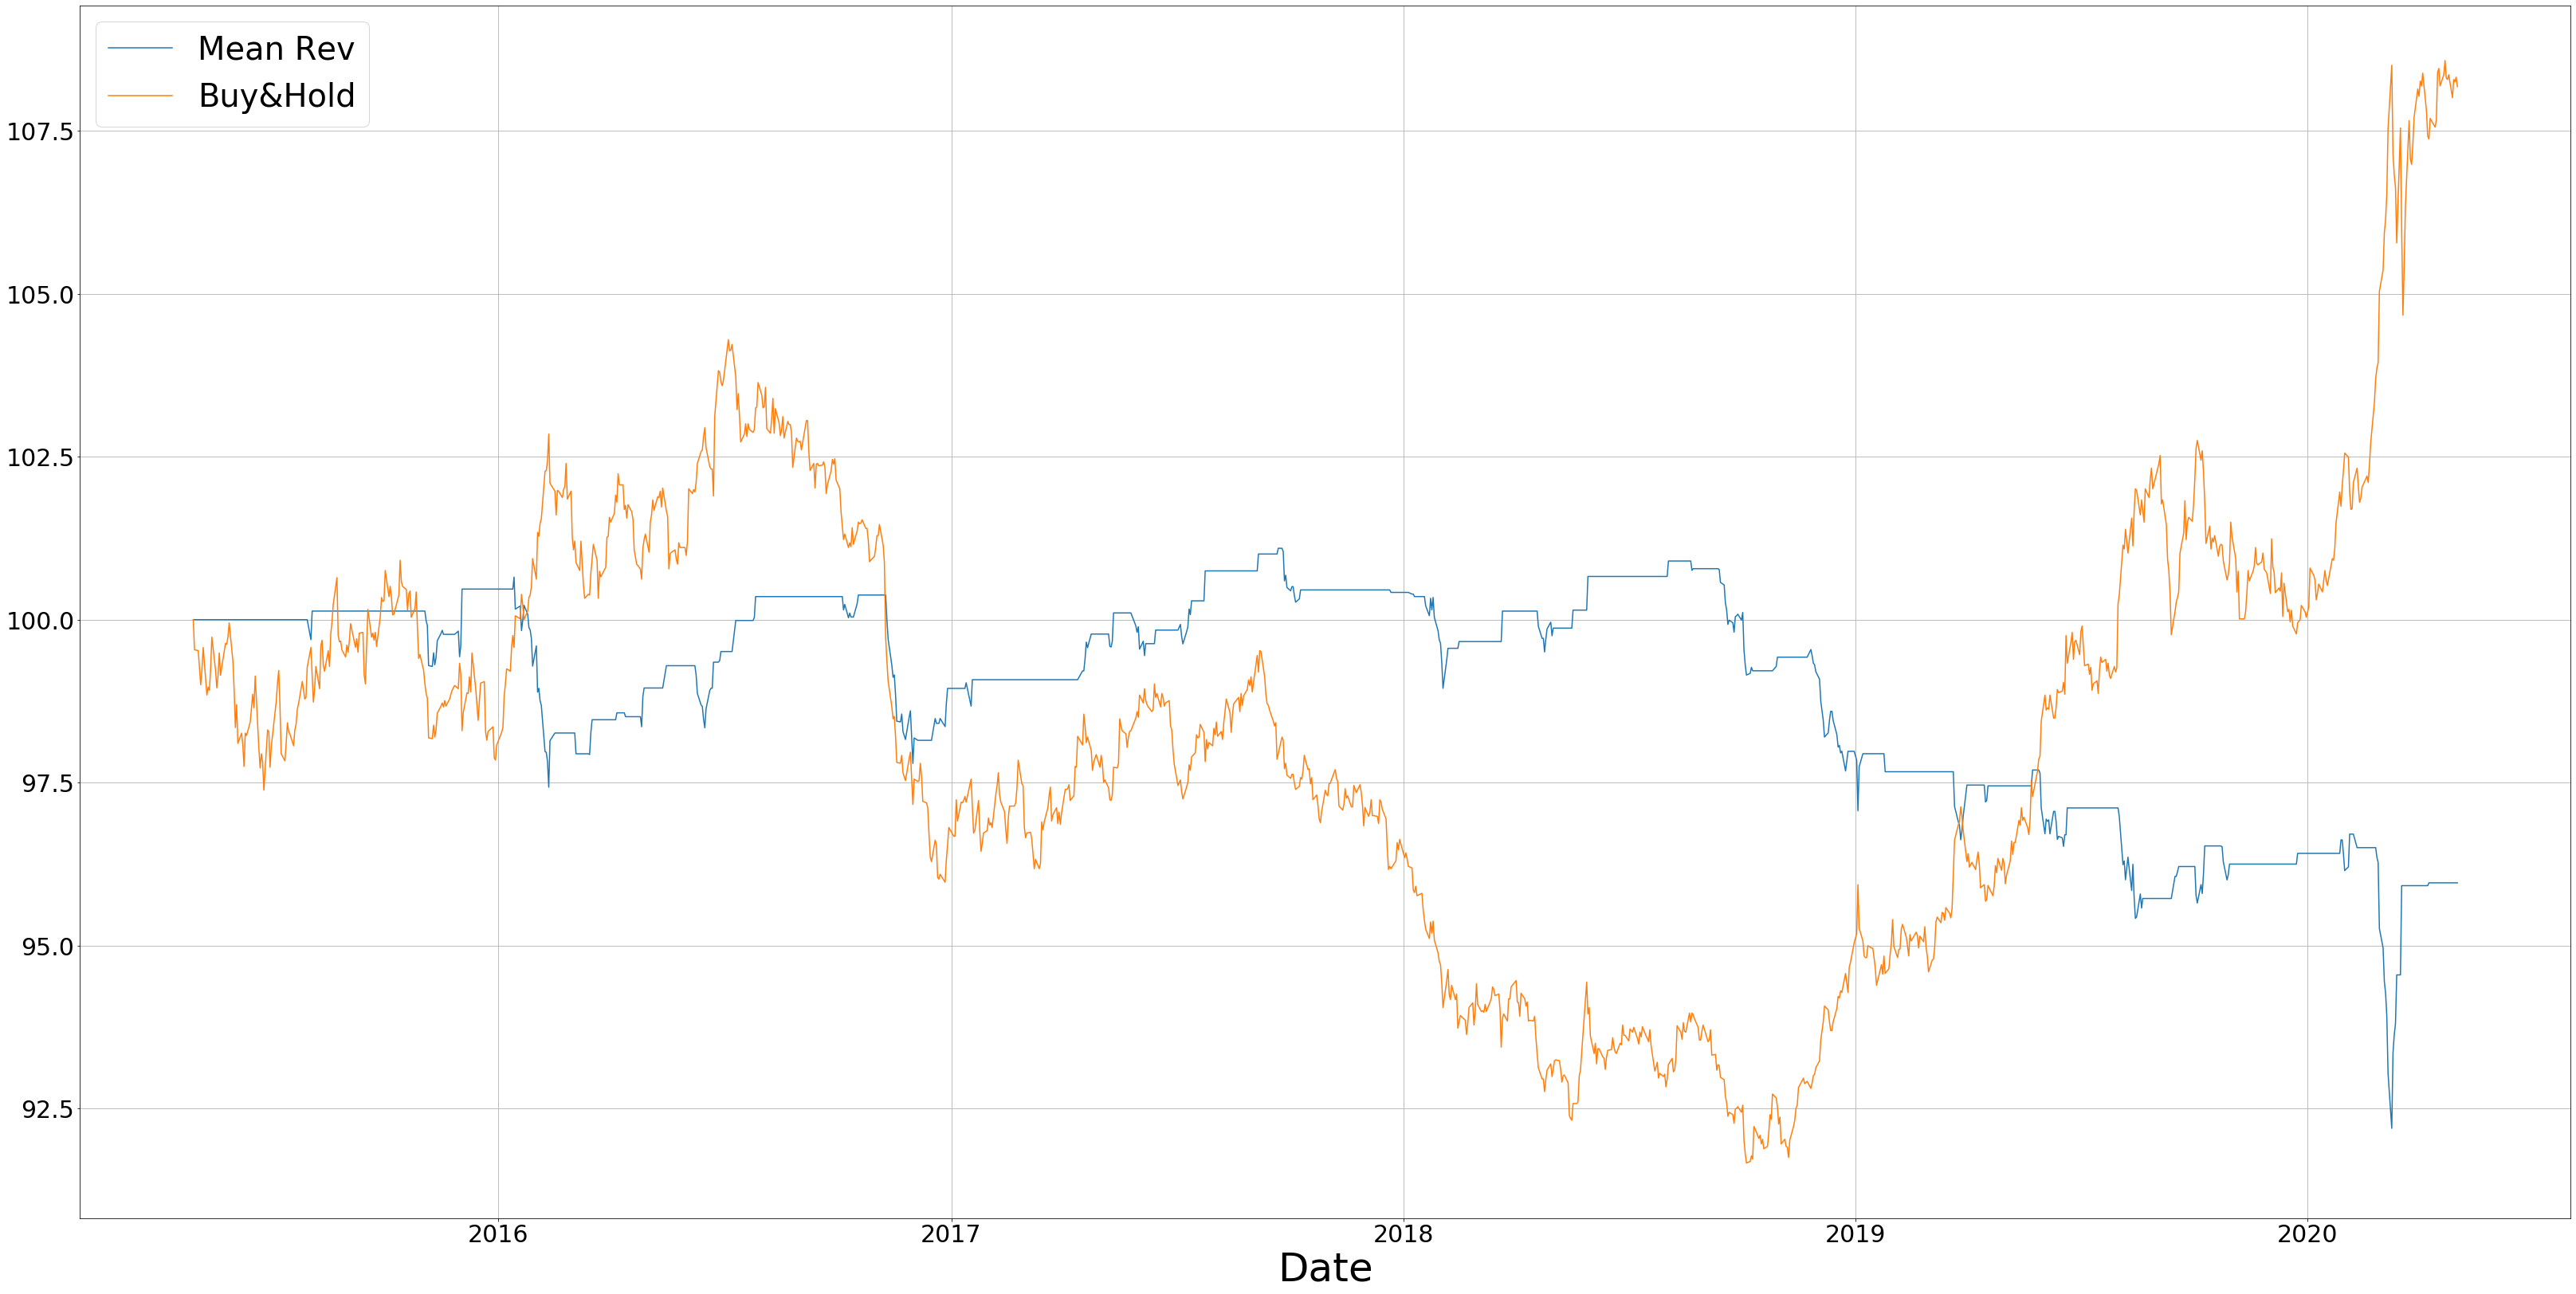

In [74]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Resultados["Mean Rev"])
ax1 = plt.plot(Resultados["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Mean Rev", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [75]:
US_Treasury_RSI = pd.DataFrame(Resultados.loc[:, 'Mean Rev'])
US_Treasury_RSI.columns = ['MeanRev_US_Treasury']
US_Treasury_RSI

,MeanRev_US_Treasury
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [76]:
US_Treasury_RSI.to_csv('./data_resultante/US_Treasury_RSI.csv')